<a href="https://colab.research.google.com/github/Elish-Ab/AI_Mastery_10x_Week8_9/blob/main/notebooks/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
import ipaddress

In [ ]:
!pip install sidetable

In [ ]:
import sidetable as stb

In [ ]:
# Load the datasets
fraud_data = pd.read_csv('Fraud_Data.csv')
ip_data = pd.read_csv('IpAddress_to_Country.csv')
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
fraud_data.stb.missing()

,missing,total,percent
user_id,0,151112,0.0
signup_time,0,151112,0.0
purchase_time,0,151112,0.0
purchase_value,0,151112,0.0
device_id,0,151112,0.0
source,0,151112,0.0
browser,0,151112,0.0
sex,0,151112,0.0
age,0,151112,0.0
ip_address,0,151112,0.0


In [ ]:
credit_card_data.stb.missing()

,missing,total,percent
Time,0,284807,0.0
V16,0,284807,0.0
Amount,0,284807,0.0
V28,0,284807,0.0
V27,0,284807,0.0
V26,0,284807,0.0
V25,0,284807,0.0
V24,0,284807,0.0
V23,0,284807,0.0
V22,0,284807,0.0


In [ ]:
ip_data.stb.missing()

,missing,total,percent
lower_bound_ip_address,0,138846,0.0
upper_bound_ip_address,0,138846,0.0
country,0,138846,0.0


In [ ]:
fraud_data.drop_duplicates(inplace=True)
credit_card_data.drop_duplicates(inplace=True)

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [ ]:
# Correct data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['purchase_value'] = pd.to_numeric(fraud_data['purchase_value'], errors='coerce')
fraud_data['age'] = pd.to_numeric(fraud_data['age'], errors='coerce')

In [ ]:
ip_data.stb.freq(['country'])

,country,count,percent,cumulative_count,cumulative_percent
0,United States,46868,33.755384,46868,33.755384
1,Canada,6989,5.033634,53857,38.789018
2,Russian Federation,6739,4.853579,60596,43.642597
3,Australia,6316,4.548925,66912,48.191522
4,Germany,5999,4.320614,72911,52.512136
...,...,...,...,...,...
230,Korea Democratic People's Republic of,1,0.000720,138842,99.997119
231,Eritrea,1,0.000720,138843,99.997839
232,Cook Islands,1,0.000720,138844,99.998560
233,Comoros,1,0.000720,138845,99.999280


<Axes: title={'center': 'Distribution of Age'}, ylabel='Frequency'>

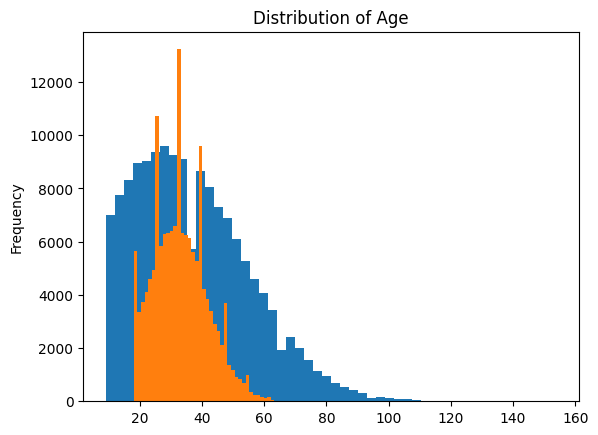

In [ ]:
fraud_data['purchase_value'].plot(kind='hist', bins=50, title="Distribution of Purchase Value")
fraud_data['age'].plot(kind='hist', bins=50, title="Distribution of Age")

<Axes: title={'center': 'Avg Purchase Value by Fraud Class'}, xlabel='class'>

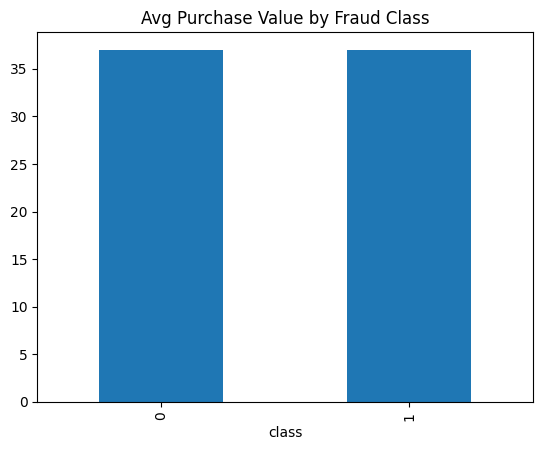

In [ ]:
fraud_data.groupby('class')['purchase_value'].mean().plot(kind='bar', title="Avg Purchase Value by Fraud Class")

In [ ]:
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(str)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(str)

fraud_data['ip_address'] = fraud_data['ip_address'].astype(str)

def find_country(ip):
    for _, row in ip_data.iterrows():
        if row['lower_bound_ip_address'] <= ip <= row['upper_bound_ip_address']:
            return row['country']
    return None

fraud_data['country'] = fraud_data['ip_address'].apply(find_country)

fraud_data.drop(columns=['ip_address'], inplace=True)


categorical_cols = ['source', 'browser', 'sex', 'country']
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = pd.DataFrame(encoder.fit_transform(fraud_data[categorical_cols]),
                             columns=encoder.get_feature_names_out(categorical_cols))

fraud_data = pd.concat([fraud_data, encoded_cats], axis=1)
fraud_data.drop(columns=categorical_cols, inplace=True)

fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

# time-based features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.weekday

# Normalization and Scaling
scaler = StandardScaler()
fraud_data[['purchase_value', 'age']] = scaler.fit_transform(fraud_data[['purchase_value', 'age']])

# Split the data for training and testing
X_fraud = fraud_data.drop(columns=['class', 'user_id', 'device_id'])
y_fraud = fraud_data['class']
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(X_fraud, y_fraud, test_size=0.3, random_state=42)

# Print shapes of training sets to confirm the splits
print(f"Shapes of training sets:\nX_train_fraud: {X_train_fraud.shape}, y_train_fraud: {y_train_fraud.shape}")

Shapes of training sets:
X_train_fraud: (105778, 83), y_train_fraud: (105778,)
